In [11]:
import pickle
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold
import numpy as np
from sklearn.preprocessing.data import StandardScaler
from sklearn.decomposition import PCA

In [12]:
with open('matrix.pkl', 'rb') as f:
    distances = np.array(pickle.load(f))
    # square two dimencial array wich contains distances between points
# distances = np.array([
#     [0, 5, 6],
#     [5, 0, 3],
#     [6, 3, 0],
# ])

def get_distance(i, j):
    i = int(i[0])
    j = int(j[0])
    return distances[i][j]

In [13]:
distances = StandardScaler().fit_transform(distances)

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [17]:
# tr = manifold.MDS(n_components=2, n_jobs=-1)
# tr = manifold.TSNE(n_components=2, init='pca')
tr = PCA(n_components=3)
X = tr.fit_transform(distances)
# print("mean: {}\nprojection: {}\nexaplained variance ratio: {}".format(tr.mean_, tr.components_, tr.explained_variance_ratio_))
X = StandardScaler().fit_transform(X)

In [15]:
y_pred = DBSCAN(n_jobs=-1).fit_predict(X)
# y_pred = KMeans(n_clusters=3).fit_predict(pos)

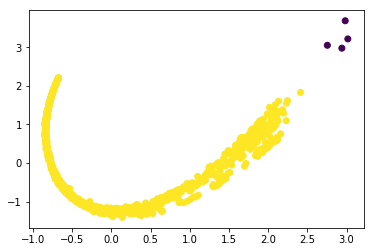

In [16]:
#2D
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

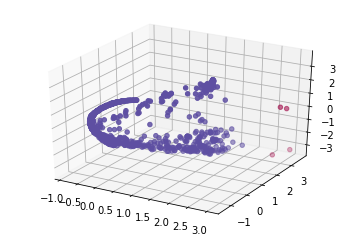

In [18]:
#%matplotlib notebook
# 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred, cmap=plt.cm.Spectral)
plt.show()